# Homework 1

## 1. How many sequences?
## 2. The lenght of sequences?
## 3. The longest (shortest) sequences?
## 4. Amino-acid frequency?

In [1]:
import gzip
import re
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import operator
import numpy as np

In [2]:
with gzip.GzipFile('Spombe_pep.20160223.fa.gz', 'r') as gz:
    seq_dict = dict() # dictionary(key = sequence description, value = sequence)
    last_key = None
    for line in gz:
        trimmed_line = line.strip('\n') # remove line separator
        if trimmed_line.startswith('>'): # additional condition for sequences with the same header
            last_key = trimmed_line.strip('>') 
            seq_dict.setdefault(last_key, '') # initialise new sequence
        else:
            seq_dict[last_key] += re.sub('\*', '', trimmed_line) # if key already exists, just append the new line to the sequence

In [3]:
len(seq_dict)

5145

## 1. 5145 sequences

In [4]:
seq_dict_len = dict(map(lambda (k, v): (k, (v, len(v))), seq_dict.iteritems())) # description -> (sequence, len(sequence))

In [5]:
seq_dict_len[seq_dict_len.keys()[0]]

('MLWNTQYFRIEGMISLGWPRLAKTSILKFVPIAQNHRIRKMKVQDDFILTIDDSEDDIHYDDYDADAVDEEMPSNVELKKKSKKATPAKDSDFNGEFLFEADVNKDLSSATDMNWDFDMGSKTESNRASNTVDLDAIISRNRKPDDDEFPSSFPSEEELQEPEQENIDSDDEDLAIDGFGAGAIAENEDESSQDESESEEEDDITEPVPSFANISTQDFNSDSAAGSSDSEEDEEEIAKKNAFFAEGDKEKSMMTTTHSSFQSMNLSRPILKGLSNLGFEVPTQIQDKTIPLALLGKDIVGAAVTGSGKTAAFIVPILERLLYRPKKVPTTRVLILCPTRELAMQCHSVATKIASFTDIMVCLCIGGLSLKLQEQELRKRPDIVIATPGRFIDHMRNSQGFTVENIEIMVMDEADRMLEDGFADELNEIIQACPKSRQTMLFSATMTDKVDDLIRLSLNRPVRVFVDNKKTTAKLLTQEFVRVRPQRELLRPAMLIYLCKELFHRRTIIFFRSKAFAHKMRVIFGLLSLNATEIHGSLSQEQRVRALEDFRDGKCNYLLATDVASRGIDIKGIEVVINYEAPATHEVYLHRVGRTARAGRSGRAITLAGEGDRKVLKGVFKNSSAQNTKLVNRNLDFNKVEKFGKEIEELEPVVQKVLDEEKQERELKIAERDLKKGENIMKYGDEIRSRPARTWFQSEKDKQASKASEAKDKKSLAKRKKQMEKEEVPRAYKKTKNDRLSNKKSTKKSKSKRK',
 754)

In [6]:
seq_list = seq_dict_len.items()

In [7]:
seq_list.sort(key=lambda x:x[1][1]) # sorted by decreasing order of the length of the sequence

## 2. Lengths of the sequences

In [8]:
lengths_vals = map(lambda x: x[1][1], seq_list) # all values of the length of the sequence

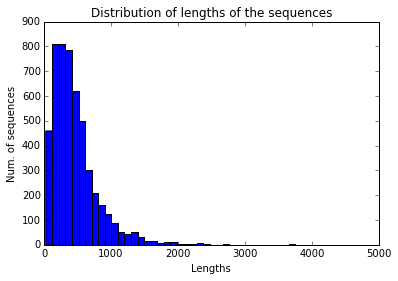

In [9]:
plt.hist(lengths_vals, bins = 50)
plt.title('Distribution of lengths of the sequences')
plt.xlabel('Lengths')
plt.ylabel('Num. of sequences')
plt.show()

In [10]:
max(lengths_vals) # max value

4924

In [11]:
max_seqs = filter(lambda x: x[1][1] == max(lengths_vals), seq_list) # max sequence(s)

In [12]:
max_seqs_names = map(lambda x: x[0], max_seqs)
if len(max_seqs) == 1:
    print "There is only one sequence with the maximum sequence length of %d" % max(lengths_vals)
else:
    print "There are %d sequences with the maximum length of %d" % (len(max_seqs), max(lengths_vals))
print max_seqs_names

There is only one sequence with the maximum sequence length of 4924
['SPAC23G3.02c|sib1|I|ferrichrome synthetase Sib1']


In [13]:
min(lengths_vals)

24

In [14]:
min_seqs = filter(lambda x: x[1][1] == min(lengths_vals), seq_list) # min sequence(s)

In [15]:
min_seqs_names = map(lambda x: x[0], min_seqs)
if len(min_seqs) == 1:
    print "There is only one sequence with the minimum sequence length of %d" % min(lengths_vals)
else:
    print "There are %d sequences with the minimum length of %d" % (len(max_seqs), min(lengths_vals))
print min_seqs_names

There is only one sequence with the minimum sequence length of 24
['SPAC20G4.09|SPAC20G4.09|I|Schizosaccharomyces pombe specific protein']


## 3. Max = 4924, min = 24

In [16]:
acid_dict = dict() # dictionary for acids distribution
for seq in seq_dict.values():
    for acid in seq:
        acid_dict.setdefault(acid, 0) # initialise acids
        acid_dict[acid] += 1

In [17]:
acid_dict['A'] # check

148546

In [18]:
acid_dict_freq = acid_dict # convert absolute values to fractions
total_acids = sum(acid_dict.values())
for key, value in acid_dict.iteritems():
    acid_dict_freq[key] = value / 1.0 / total_acids

In [19]:
acid_dict_freq

{'A': 0.06221134081927695,
 'C': 0.014682355542675071,
 'D': 0.05339137368684677,
 'E': 0.06523173982018324,
 'F': 0.046139819513151215,
 'G': 0.04923350883923202,
 'H': 0.02263330881946457,
 'I': 0.06159193287108776,
 'K': 0.06437612762400305,
 'L': 0.09872918764165974,
 'M': 0.020669128104787576,
 'N': 0.052103976774924156,
 'P': 0.047132798718801355,
 'Q': 0.03819221665122684,
 'R': 0.04867440835861501,
 'S': 0.09423041808151894,
 'T': 0.055027632546600085,
 'V': 0.06032505725021401,
 'W': 0.01119038564950305,
 'Y': 0.03423328268622862}

## 4. Distribution of amino-acids

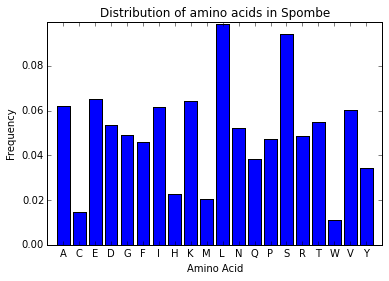

In [20]:
X = np.arange(len(acid_dict_freq))
plt.bar(X, acid_dict_freq.values(), align = 'center')
plt.xticks(X, acid_dict_freq.keys())
ymax = max(acid_dict_freq.values()) + 0.001
plt.ylim(0, ymax)
plt.xlim(-1, 20)
plt.xlabel('Amino Acid')
plt.ylabel('Frequency')
plt.title('Distribution of amino acids in Spombe')
plt.show()

# Homework 2
## Distributions of amino acids in each chromosome

### First, we need to extract from the header line the chromosome id
### In this case, the header looks like this: [id_of_sequence|gene_name|chromosome_id, etc.]

In [21]:
seq_dict.keys()[0]

'SPAC30D11.03|ddx27|I|ATP-dependent RNA helicase Ddx27/Drs1 (predicted)'

In [22]:
seq_dict.keys()[0].split('|') # if we split by vertical line, we can see that the third value in the list contains chromosome identificator

['SPAC30D11.03',
 'ddx27',
 'I',
 'ATP-dependent RNA helicase Ddx27/Drs1 (predicted)']

In [23]:
chromosome_id_keys = [(x.split('|')[2],y) for x,y in seq_dict.iteritems() if 'AB325691' not in x.split('|')[2]] # extract chromosome id by regular expression

In [24]:
chromosome_dict = dict() # dictionary (chromosome, sequences)
for chrm, seq in chromosome_id_keys:
    chromosome_dict.setdefault(chrm, '')
    chromosome_dict[chrm] += seq

In [25]:
assert(len(''.join(dict((x, y) for x,y in seq_dict.iteritems() if 'AB325691' not in x.split('|')[2]).values())) == len(''.join(chromosome_dict.values()))) # check that the length of the whole protein stays the same

In [26]:
print "The total number of chromosomes is %d" % len(chromosome_dict.keys())
print "These chromosomes are", chromosome_dict.keys()

The total number of chromosomes is 5
These chromosomes are ['I', 'II', 'MTR', 'III', 'MT']


In [27]:
plt.rcParams['figure.figsize'] = (15, 12.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

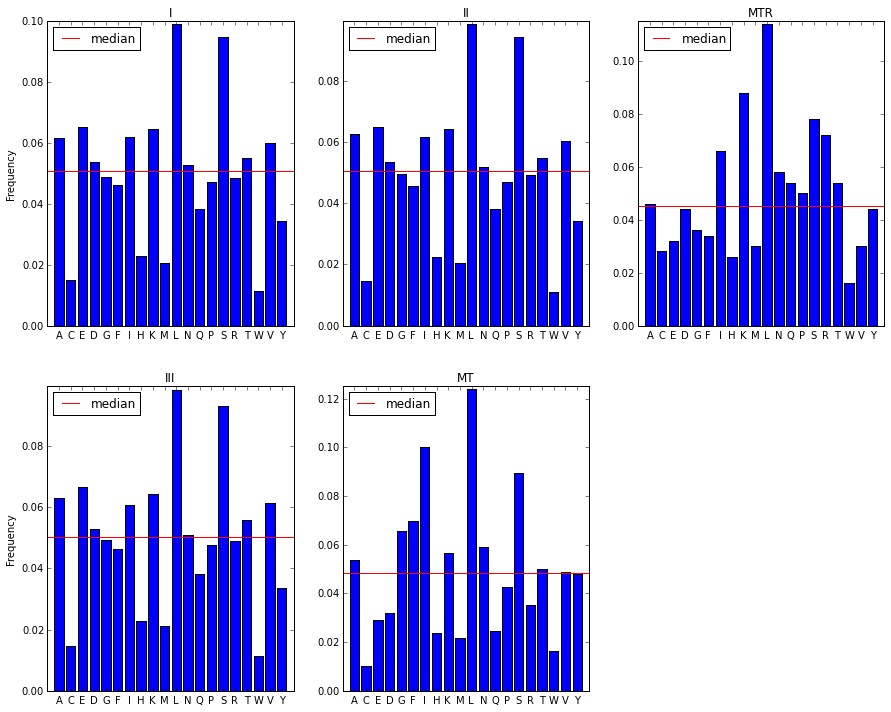

In [28]:
col = 0
row = 0
ind = 0

for chr_id, chr_seq in chromosome_dict.iteritems():
    ind += 1
    
    plt.subplots_adjust(hspace=.2)
    plt.subplot(2, 3, ind) # 2 rows, 3 cols
    
    letters_dict = dict()
    for letter in chr_seq:
        try:
            letters_dict[letter] += 1
        except KeyError:
            letters_dict.setdefault(letter, 1)
            
    # convert raw numbers to frequencies
    # i.e. fractions, or ratios
    total_number = sum(letters_dict.values())
    for key, value in letters_dict.iteritems():
        letters_dict[key] = value / 1.0 / total_number
    X = np.arange(len(letters_dict))
    plt.bar(X, letters_dict.values(), align = 'center')
    plt.xticks(X, letters_dict.keys(), rotation=0)
    ymax = max(letters_dict.values()) + 0.001
    plt.axhline(y=np.median(letters_dict.values()), xmin=-1, xmax=20, linewidth=1, color = 'r', label = 'median')
    plt.ylim(0, ymax)
    plt.xlim(-1, 20)
    #plt.xlabel('Amino Acid')
    if ind % 3 == 1:
        plt.ylabel('Frequency')
    plt.title(chr_id)
    plt.legend(loc = 2)
plt.show()

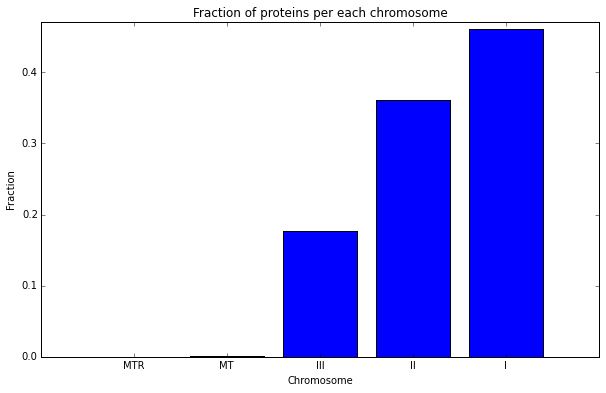

In [29]:
plt.figure(figsize= (10, 6.0))

# convert raw numbers to frequencies
# i.e. fractions, or ratios
chromosome_len_dict = dict()
total_number = sum(map(len, chromosome_dict.values()))

for key, value in chromosome_dict.iteritems():
    chromosome_len_dict.setdefault(key, len(value) / 1.0 / total_number)        

chromosome_len_dict = sorted(chromosome_len_dict.items(), key = operator.itemgetter(1))
X = np.arange(len(chromosome_len_dict))
plt.bar(X, [x[1] for x in chromosome_len_dict], align = 'center')
plt.xticks(X, [x[0] for x in chromosome_len_dict], rotation=0)
ymax = max([x[1] for x in chromosome_len_dict]) + 0.01
#plt.axhline(y=np.median(letters_dict.values()), xmin=-1, xmax=20, linewidth=1, color = 'r', label = 'median')
plt.ylim(0, ymax)
plt.xlim(-1, len(X))
plt.xlabel('Chromosome')
plt.ylabel('Fraction')
plt.title("Fraction of proteins per each chromosome")
plt.show()